<a href="https://colab.research.google.com/github/xantrich3/xantrich3/blob/main/Behind_the_Scenes_Retail_Casestudy_Project_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import relevant csv files and create respective dataframes
path="/content/drive/MyDrive/Products.csv"
products_df=pd.read_csv(path, encoding="ISO-8859-1")

path="/content/drive/MyDrive/Shipping.csv"
shipping_df=pd.read_csv(path, encoding="ISO-8859-1")

path="/content/drive/MyDrive/Stores.csv"
stores_df1=pd.read_csv(path, encoding="ISO-8859-1")

path="/content/drive/MyDrive/Transactions.csv"
transactions_df=pd.read_csv(path, encoding="ISO-8859-1")


In [3]:
#Create files list containing all four dataframes
files = [products_df, shipping_df, stores_df1, transactions_df]

In [4]:
for i in files:
    print(i.isnull().sum())

ProductID    0
Name         0
Price        0
Cost         0
dtype: int64
OrderID           0
City              0
ShippingMethod    9
dtype: int64
StoreID    10
City        0
dtype: int64
ProductID    0
Year         0
Month        0
Day          0
Quantity     0
OrderLine    0
OrderID      0
dtype: int64


In [5]:
stores_df1

,StoreID,City
0,NaN,Surrey
1,NaN,Langley
2,NaN,Vancouver
3,NaN,Burnaby
4,NaN,Los Angeles
5,NaN,New York
6,NaN,Portland
7,NaN,Utah
8,NaN,Seattle
9,NaN,Kelowna


In [6]:
#create a list of sequential numbers from 1 to 10
StoreIDs= list(range(1,11))

In [7]:
#create a for loop that assigns each of the items from the list to the StoreID column of stores_df
for i in stores_df1.index:
    stores_df1['StoreID'][i]=StoreIDs[i]

<ipython-input-7-ec1357bc8f0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stores_df1['StoreID'][i]=StoreIDs[i]


In [8]:
stores_df1

,StoreID,City
0,1.0,Surrey
1,2.0,Langley
2,3.0,Vancouver
3,4.0,Burnaby
4,5.0,Los Angeles
5,6.0,New York
6,7.0,Portland
7,8.0,Utah
8,9.0,Seattle
9,10.0,Kelowna


In [9]:
#Identify the unique values and count of rows in the ShippingMethod column
shipping_df['ShippingMethod'].value_counts(dropna=False)

Standard     535
Expedited     55
Nextday       55
NaN            9
Name: ShippingMethod, dtype: int64

In [10]:
#Fill the na values with 'Expedited'
shipping_df['ShippingMethod'] = shipping_df['ShippingMethod'].fillna('Expedited')

In [11]:
#Check the unique values and counts
shipping_df['ShippingMethod'].value_counts(dropna=False)

Standard     535
Expedited     64
Nextday       55
Name: ShippingMethod, dtype: int64

In [12]:
#Create and print storeIDs and cities lists
storeIDs2 = list(range(11,16))
cities = ['Seoul', 'Tokyo', 'Denver', 'Miami', 'San Diego']

print(storeIDs2)
print(cities)

[11, 12, 13, 14, 15]
['Seoul', 'Tokyo', 'Denver', 'Miami', 'San Diego']


In [13]:
#create and print stores_dict dictionary with the storeIDs and cities lists
stores_dict = {'StoreID': storeIDs2,
              'City': cities}
stores_dict

{'StoreID': [11, 12, 13, 14, 15],
 'City': ['Seoul', 'Tokyo', 'Denver', 'Miami', 'San Diego']}

In [14]:
#create and print stores_df2 dataframe from the stores_dict dictionary
stores_df2 = pd.DataFrame(data=stores_dict)
stores_df2

,StoreID,City
0,11,Seoul
1,12,Tokyo
2,13,Denver
3,14,Miami
4,15,San Diego


In [15]:
stores_df= pd.concat([stores_df1, stores_df2])
stores_df

,StoreID,City
0,1.0,Surrey
1,2.0,Langley
2,3.0,Vancouver
3,4.0,Burnaby
4,5.0,Los Angeles
5,6.0,New York
6,7.0,Portland
7,8.0,Utah
8,9.0,Seattle
9,10.0,Kelowna


In [16]:
#create stores_df by concatenatiing the stores_df1 and stores_df2 dataframes
stores_df = pd.concat([stores_df1, stores_df2]).reset_index()
stores_df

,index,StoreID,City
0,0,1.0,Surrey
1,1,2.0,Langley
2,2,3.0,Vancouver
3,3,4.0,Burnaby
4,4,5.0,Los Angeles
5,5,6.0,New York
6,6,7.0,Portland
7,7,8.0,Utah
8,8,9.0,Seattle
9,9,10.0,Kelowna


In [17]:
#create stores_df by concatenating the stores_df1 and stores_df2 dataframes
stores_df = pd.concat([stores_df1, stores_df2]).reset_index().drop('index', axis=1)

In [18]:
stores_df

,StoreID,City
0,1.0,Surrey
1,2.0,Langley
2,3.0,Vancouver
3,4.0,Burnaby
4,5.0,Los Angeles
5,6.0,New York
6,7.0,Portland
7,8.0,Utah
8,9.0,Seattle
9,10.0,Kelowna


In [19]:
#identify duplicate rows in transactions_df
transactions_df[transactions_df.duplicated()]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID
122,20,2019,11,7,4,122,122
123,20,2019,11,7,4,122,122
124,20,2019,11,7,4,122,122
125,20,2019,11,7,4,122,122
126,20,2019,11,7,4,122,122
127,20,2019,11,7,4,122,122
128,20,2019,11,7,4,122,122


In [20]:
#drop duplicate rows in transactions_df
transactions_df = transactions_df.drop_duplicates()

In [21]:
#print transactions_df to check the results of dropping duplicates
transactions_df[transactions_df.duplicated()]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID


In [22]:
#Identify the data types in shipping_df and transactions_df
shipping_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         654 non-null    float64
 1   City            654 non-null    object 
 2   ShippingMethod  654 non-null    object 
dtypes: float64(1), object(2)
memory usage: 15.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 660
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ProductID  654 non-null    int64
 1   Year       654 non-null    int64
 2   Month      654 non-null    int64
 3   Day        654 non-null    int64
 4   Quantity   654 non-null    int64
 5   OrderLine  654 non-null    int64
 6   OrderID    654 non-null    int64
dtypes: int64(7)
memory usage: 40.9 KB


In [23]:
#Change the data type of OrderID to Integer
shipping_df['OrderID']= shipping_df['OrderID'].astype('int')

In [24]:
#Change the data type of Year, Month, and Day to string
transactions_df['Year']=transactions_df['Year'].astype('str')
transactions_df['Month']=transactions_df['Month'].astype('str')
transactions_df['Day']=transactions_df['Day'].astype('str')

<ipython-input-24-e74a1bc552d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_df['Year']=transactions_df['Year'].astype('str')
<ipython-input-24-e74a1bc552d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_df['Month']=transactions_df['Month'].astype('str')
<ipython-input-24-e74a1bc552d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [25]:
#print shipping_df and transactions_df to check the results of the change in data type
shipping_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderID         654 non-null    int64 
 1   City            654 non-null    object
 2   ShippingMethod  654 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 660
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductID  654 non-null    int64 
 1   Year       654 non-null    object
 2   Month      654 non-null    object
 3   Day        654 non-null    object
 4   Quantity   654 non-null    int64 
 5   OrderLine  654 non-null    int64 
 6   OrderID    654 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 40.9+ KB


In [26]:
#View the top 5 rows of products_df
products_df.head()

,ProductID,Name,Price,Cost
0,1,"Sweater,Blue",30,10
1,2,"Sweater,Black",35,10
2,3,"Sweater,White",30,10
3,4,"Hoodie,Black",40,15
4,5,"Hoodie,White",35,15


In [27]:
#View the columns
products_df

,ProductID,Name,Price,Cost
0,1,"Sweater,Blue",30,10
1,2,"Sweater,Black",35,10
2,3,"Sweater,White",30,10
3,4,"Hoodie,Black",40,15
4,5,"Hoodie,White",35,15
5,6,"Hoodie,Gray",35,15
6,7,"T-shirt,White",15,2
7,8,"T-shirt,Black",20,2
8,9,"T-shirt,Grey",15,2
9,10,"T-shirt,Blue",15,2


In [28]:
#Create Type and Colour columns by splitting the name column
products_df['Type']=products_df['Name'].str.split(',', expand=True)[0]
products_df['Colour']=products_df['Name'].str.split(',', expand=True)[1]

In [29]:
#Print products_df tp check new columns
products_df

,ProductID,Name,Price,Cost,Type,Colour
0,1,"Sweater,Blue",30,10,Sweater,Blue
1,2,"Sweater,Black",35,10,Sweater,Black
2,3,"Sweater,White",30,10,Sweater,White
3,4,"Hoodie,Black",40,15,Hoodie,Black
4,5,"Hoodie,White",35,15,Hoodie,White
5,6,"Hoodie,Gray",35,15,Hoodie,Gray
6,7,"T-shirt,White",15,2,T-shirt,White
7,8,"T-shirt,Black",20,2,T-shirt,Black
8,9,"T-shirt,Grey",15,2,T-shirt,Grey
9,10,"T-shirt,Blue",15,2,T-shirt,Blue


In [30]:
#Identify the unique values of colour
products_df['Colour'].unique()

array(['Blue', 'Black', 'White', 'Gray', 'Grey', 'Green', 'Red'],
      dtype=object)

In [31]:
#Replace the values of 'Gray' with 'Grey'
products_df['Colour']= products_df['Colour'].str.replace('Gray', 'Grey')

In [32]:
#Review the new unique values of colour
products_df['Colour'].unique()

array(['Blue', 'Black', 'White', 'Grey', 'Green', 'Red'], dtype=object)

In [33]:
#Merge transactions_df and products_df - returning all matching rows to the transactions_df
order_df = pd.merge(transactions_df, products_df, on = 'ProductID', how = 'left')

#Merge shipping_df and stores_df - returning only matching rows in both dataframes
shipping_stores_df = pd.merge(shipping_df, stores_df, on = 'City', how = 'inner')

#Merge orders_df and shipping_stores_df - returning only matching rows from the shipping_stores_df
order_df = pd.merge(order_df, shipping_stores_df, on = 'OrderID', how = 'right')

In [34]:
#Print order_df to inspect the new dataframe
order_df

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,Type,Colour,City,ShippingMethod,StoreID
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,Sweater,White,Vancouver,Standard,3.0
1,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,T-shirt,Black,Vancouver,Standard,3.0
2,7,2019,2,9,2,16,16,"T-shirt,White",15,2,T-shirt,White,Vancouver,Nextday,3.0
3,8,2019,2,26,4,25,25,"T-shirt,Black",20,2,T-shirt,Black,Vancouver,Expedited,3.0
4,2,2019,2,28,2,27,27,"Sweater,Black",35,10,Sweater,Black,Vancouver,Standard,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,14,2020,12,6,2,265,265,"Socks,Green",10,1,Socks,Green,San Diego,Expedited,15.0
599,7,2020,12,25,4,276,276,"T-shirt,White",15,2,T-shirt,White,San Diego,Standard,15.0
600,14,2021,2,23,4,304,304,"Socks,Green",10,1,Socks,Green,San Diego,Standard,15.0
601,7,2021,4,25,5,335,335,"T-shirt,White",15,2,T-shirt,White,San Diego,Standard,15.0


In [35]:
#Create Date column
order_df['Date']= order_df['Year']+'-'+order_df['Month']+'-'+order_df['Day']

#Set the data type to 'datetime64[ns]'
order_df['Date']= order_df['Date'].astype('datetime64[ns]')

In [36]:
#Inspect order_df to check the new column
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 602
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ProductID       603 non-null    int64         
 1   Year            603 non-null    object        
 2   Month           603 non-null    object        
 3   Day             603 non-null    object        
 4   Quantity        603 non-null    int64         
 5   OrderLine       603 non-null    int64         
 6   OrderID         603 non-null    int64         
 7   Name            603 non-null    object        
 8   Price           603 non-null    int64         
 9   Cost            603 non-null    int64         
 10  Type            603 non-null    object        
 11  Colour          603 non-null    object        
 12  City            603 non-null    object        
 13  ShippingMethod  603 non-null    object        
 14  StoreID         603 non-null    float64       
 15  Date  

In [37]:
#Create Discount Pct column
order_df['Discount Pct'] = np.where(
(
    (order_df['Type']=='Socks') &
    ((order_df['Colour'] == 'Green') | (order_df['Colour'] == 'Grey'))
)
    , 30, 0)

In [38]:
#Print order_df where the rows have a type of 'socks'
order_df[(order_df['Type'] == 'Socks')]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,Type,Colour,City,ShippingMethod,StoreID,Date,Discount Pct
17,12,2019,6,26,3,74,74,"Socks,Black",15,1,Socks,Black,Vancouver,Standard,3.0,2019-06-26,0
19,12,2019,7,6,5,80,80,"Socks,Black",15,1,Socks,Black,Vancouver,Standard,3.0,2019-07-06,0
31,11,2019,12,8,1,133,133,"Socks,White",10,1,Socks,White,Vancouver,Standard,3.0,2019-12-08,0
42,14,2020,3,31,2,167,167,"Socks,Green",10,1,Socks,Green,Vancouver,Expedited,3.0,2020-03-31,30
47,11,2020,4,13,5,178,178,"Socks,White",10,1,Socks,White,Vancouver,Standard,3.0,2020-04-13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,13,2021,1,22,3,290,290,"Socks,Grey",10,1,Socks,Grey,Seoul,Expedited,11.0,2021-01-22,30
596,13,2020,10,31,2,251,251,"Socks,Grey",10,1,Socks,Grey,San Diego,Standard,15.0,2020-10-31,30
597,14,2020,11,30,5,260,260,"Socks,Green",10,1,Socks,Green,San Diego,Standard,15.0,2020-11-30,30
598,14,2020,12,6,2,265,265,"Socks,Green",10,1,Socks,Green,San Diego,Expedited,15.0,2020-12-06,30


In [39]:
#Create Sale Price, calculating the price after a discount has been applied
order_df['Sale Price'] = order_df['Price']*(100-order_df['Discount Pct'])/100

In [40]:
#Create Net Profit, calculating the difference between the Sale Price and Cost
order_df['Net Profit'] = order_df['Sale Price']- order_df['Cost']

In [41]:
#Create Total Revenue, calculating the Sale Price by Quantity
order_df['Total Revenue'] = order_df['Sale Price']*order_df['Quantity']

In [42]:
#Create Total Cost, calculating the Cost by Quantity
order_df['Total Cost'] = order_df['Cost']*order_df['Quantity']

In [43]:
#Create Total Net Profit, calculating the difference between Total Revenue and Total Cost
order_df['Total Net Profit']= order_df['Total Revenue'] - order_df['Total Cost']

In [44]:
#Print order_df to check the new columns
order_df.head()

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,...,Vancouver,Standard,3.0,2019-01-02,0,30.0,20.0,60.0,20,40.0
1,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,...,Vancouver,Standard,3.0,2019-01-09,0,20.0,18.0,80.0,8,72.0
2,7,2019,2,9,2,16,16,"T-shirt,White",15,2,...,Vancouver,Nextday,3.0,2019-02-09,0,15.0,13.0,30.0,4,26.0
3,8,2019,2,26,4,25,25,"T-shirt,Black",20,2,...,Vancouver,Expedited,3.0,2019-02-26,0,20.0,18.0,80.0,8,72.0
4,2,2019,2,28,2,27,27,"Sweater,Black",35,10,...,Vancouver,Standard,3.0,2019-02-28,0,35.0,25.0,70.0,20,50.0


In [45]:
#Define the filter condition on the Year and StoreID columns
year_city_filter = (order_df['Year']== '2019') & (order_df['StoreID']==1)

#Apply the filter condition to order_df
order_df[year_city_filter]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
320,10,2019,1,12,4,5,6,"T-shirt,Blue",15,2,...,Surrey,Standard,1.0,2019-01-12,0,15.0,13.0,60.0,8,52.0
321,9,2019,2,8,4,15,15,"T-shirt,Grey",15,2,...,Surrey,Standard,1.0,2019-02-08,0,15.0,13.0,60.0,8,52.0
322,7,2019,2,12,1,18,18,"T-shirt,White",15,2,...,Surrey,Standard,1.0,2019-02-12,0,15.0,13.0,15.0,2,13.0
323,8,2019,2,18,3,22,22,"T-shirt,Black",20,2,...,Surrey,Standard,1.0,2019-02-18,0,20.0,18.0,60.0,6,54.0
324,4,2019,3,16,3,31,31,"Hoodie,Black",40,15,...,Surrey,Standard,1.0,2019-03-16,0,40.0,25.0,120.0,45,75.0
325,8,2019,3,27,4,34,34,"T-shirt,Black",20,2,...,Surrey,Standard,1.0,2019-03-27,0,20.0,18.0,80.0,8,72.0
326,9,2019,4,2,2,37,37,"T-shirt,Grey",15,2,...,Surrey,Expedited,1.0,2019-04-02,0,15.0,13.0,30.0,4,26.0
327,6,2019,4,2,1,37,38,"Hoodie,Gray",35,15,...,Surrey,Nextday,1.0,2019-04-02,0,35.0,20.0,35.0,15,20.0
328,1,2019,4,9,4,40,40,"Sweater,Blue",30,10,...,Surrey,Standard,1.0,2019-04-09,0,30.0,20.0,120.0,40,80.0
329,8,2019,4,17,3,48,48,"T-shirt,Black",20,2,...,Surrey,Standard,1.0,2019-04-17,0,20.0,18.0,60.0,6,54.0


In [46]:
#Calculate the Total Net Profit by StoreID
store_profit_df = order_df.groupby(by='StoreID').sum('Total Net Profit')

#Calculate the average Total Net Profit
store_profit_df['Total Net Profit'].mean()

2709.0833333333335

In [47]:
order_df[['StoreID', 'City', 'OrderID']].groupby(by=['StoreID', 'City']).count()

,,OrderID
StoreID,City,
1.0,Surrey,130
2.0,Langley,73
3.0,Vancouver,165
4.0,Burnaby,139
5.0,Los Angeles,16
6.0,New York,14
7.0,Portland,15
9.0,Seattle,12
10.0,Kelowna,10


In [48]:
#Calculate the Total Cost by StoreID
store_cost_df = order_df[['StoreID', 'Total Cost']].groupby(by=['StoreID']).sum()

#Sort the values by Total Cost in descending order
store_cost_df.sort_values('Total Cost', ascending = False)

,Total Cost
StoreID,
3.0,3365
4.0,3314
1.0,2779
2.0,1677
6.0,425
10.0,388
5.0,275
7.0,272
12.0,248


In [49]:
#Filter year to 2019
y2019_df = order_df[order_df['Year']== '2019']

#Return Total Revenue by StoreID and City
y2019_df[['StoreID', 'Total Revenue']].groupby(by='StoreID').sum()

,Total Revenue
StoreID,
1.0,2383.0
2.0,1440.0
3.0,2960.0
4.0,2965.0
5.0,319.0
6.0,395.0
7.0,355.0
9.0,502.0
10.0,505.0


In [50]:
#Calculate Total Revenue for each StoreID and City
store_revenue_df = order_df[['StoreID', 'City', 'Total Revenue']].groupby(by=['StoreID', 'City']).sum()

#Calculate the maximym and minimum Total Revenue
max_revenue = store_revenue_df['Total Revenue'] == store_revenue_df['Total Revenue'].max()
min_revenue = store_revenue_df['Total Revenue'] == store_revenue_df['Total Revenue'].min()

#Return the StoreID and City with the maximum or minimum Total Revenue
store_revenue_df[max_revenue| min_revenue]

,,Total Revenue
StoreID,City,
3.0,Vancouver,12105.0
11.0,Seoul,244.0


In [51]:
order_df[order_df['Name']=='T-shirt,Black']['Quantity'].sum()

286

In [52]:
#Calculate Total Revenue and Total Cost by ProductID
product_revenue_cost_df = order_df[['ProductID', 'Total Revenue', 'Total Cost']].groupby(by='ProductID').sum()

#Calculate the Revenue Cost Ratio
product_revenue_cost_df['Revenue_Cost_Ratio'] = product_revenue_cost_df['Total Revenue']/ product_revenue_cost_df['Total Cost']

#Calculate the maximum Revenue Cost Ratio
max_revenue_cost_ratio = product_revenue_cost_df['Revenue_Cost_Ratio'] == product_revenue_cost_df['Revenue_Cost_Ratio'].max()

#Return the ProductID with the maximum Revenue Cost Ratio
product_revenue_cost_df[max_revenue_cost_ratio]

,Total Revenue,Total Cost,Revenue_Cost_Ratio
ProductID,,,
12,585.0,39,15.0


In [53]:
#Calculate Total Revenue and Total Net Profit by ProductID
product_revenue_profit_df = order_df[['ProductID', 'Total Revenue', 'Total Net Profit']].groupby(by='ProductID').sum()

In [54]:
#Return the five ProductIDs with the highest Total Revenue
product_revenue_profit_df.sort_values(by='Total Revenue', ascending = False).head()

,Total Revenue,Total Net Profit
ProductID,,
8,5720.0,5148.0
7,4440.0,3848.0
5,4305.0,2460.0
2,3605.0,2575.0
4,3480.0,2175.0


In [55]:
#Return the five ProductIds with the highest Total Net Profit
product_revenue_profit_df.sort_values(by='Total Net Profit', ascending = False).head()

,Total Revenue,Total Net Profit
ProductID,,
8,5720.0,5148.0
7,4440.0,3848.0
2,3605.0,2575.0
5,4305.0,2460.0
4,3480.0,2175.0


In [56]:
#Create a new dataframe and set in the index of the five ProductIDs with the highest Total Revenue
total_revenue_index = product_revenue_profit_df.sort_values(by='Total Revenue', ascending = False).head().index

#Create a new dataframe and set in the index of the five ProductIDs with the highest Total Net Profit
total_net_profit_index = product_revenue_profit_df.sort_values(by='Total Net Profit', ascending = False).head().index

#Compare the two dataframes to see if the top 5 products are the same for both metrics
(total_revenue_index == total_net_profit_index).sum()

3

In [57]:
#Return the first 200 rows from the order_df
order_df.iloc[:200]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,...,Vancouver,Standard,3.0,2019-01-02,0,30.0,20.0,60.0,20,40.0
1,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,...,Vancouver,Standard,3.0,2019-01-09,0,20.0,18.0,80.0,8,72.0
2,7,2019,2,9,2,16,16,"T-shirt,White",15,2,...,Vancouver,Nextday,3.0,2019-02-09,0,15.0,13.0,30.0,4,26.0
3,8,2019,2,26,4,25,25,"T-shirt,Black",20,2,...,Vancouver,Expedited,3.0,2019-02-26,0,20.0,18.0,80.0,8,72.0
4,2,2019,2,28,2,27,27,"Sweater,Black",35,10,...,Vancouver,Standard,3.0,2019-02-28,0,35.0,25.0,70.0,20,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,15,2019,6,6,1,66,66,"Jacket,Blue",50,20,...,Burnaby,Expedited,4.0,2019-06-06,0,50.0,30.0,50.0,20,30.0
196,18,2019,6,16,4,72,72,"Jacket,Black",55,20,...,Burnaby,Standard,4.0,2019-06-16,0,55.0,35.0,220.0,80,140.0
197,6,2019,6,30,3,76,76,"Hoodie,Gray",35,15,...,Burnaby,Expedited,4.0,2019-06-30,0,35.0,20.0,105.0,45,60.0
198,6,2019,7,11,2,81,82,"Hoodie,Gray",35,15,...,Burnaby,Standard,4.0,2019-07-11,0,35.0,20.0,70.0,30,40.0


In [58]:
order_df

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,...,Vancouver,Standard,3.0,2019-01-02,0,30.0,20.0,60.0,20,40.0
1,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,...,Vancouver,Standard,3.0,2019-01-09,0,20.0,18.0,80.0,8,72.0
2,7,2019,2,9,2,16,16,"T-shirt,White",15,2,...,Vancouver,Nextday,3.0,2019-02-09,0,15.0,13.0,30.0,4,26.0
3,8,2019,2,26,4,25,25,"T-shirt,Black",20,2,...,Vancouver,Expedited,3.0,2019-02-26,0,20.0,18.0,80.0,8,72.0
4,2,2019,2,28,2,27,27,"Sweater,Black",35,10,...,Vancouver,Standard,3.0,2019-02-28,0,35.0,25.0,70.0,20,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,14,2020,12,6,2,265,265,"Socks,Green",10,1,...,San Diego,Expedited,15.0,2020-12-06,30,7.0,6.0,14.0,2,12.0
599,7,2020,12,25,4,276,276,"T-shirt,White",15,2,...,San Diego,Standard,15.0,2020-12-25,0,15.0,13.0,60.0,8,52.0
600,14,2021,2,23,4,304,304,"Socks,Green",10,1,...,San Diego,Standard,15.0,2021-02-23,30,7.0,6.0,28.0,4,24.0
601,7,2021,4,25,5,335,335,"T-shirt,White",15,2,...,San Diego,Standard,15.0,2021-04-25,0,15.0,13.0,75.0,10,65.0


In [59]:
order_df.loc[499,'Total Net Profit']

30.0

In [60]:
#Calculate the orders from StoreID 7
store7_order_df = order_df[order_df['StoreID'] == 7]

#Count the number of orders
store7_order_df['OrderID'].count()

15

In [61]:
#Calculate the count of orderlines
orderID_count = order_df['OrderLine'].value_counts()

#Return the number of orders with more than one product
orderID_count[orderID_count > 1].count()

36

In [62]:
#Calculate the mean Quantity by Colour and City
colour_city_quantity_df = order_df[['Colour', 'City', 'Quantity']].groupby(['Colour', 'City']).mean()

#Return the mean Quantity values in ascending order
colour_city_quantity_df.sort_values(by = 'Quantity')

Quantity
Colour City                 
Green  Seattle      1.000000
       Los Angeles  1.000000
       Portland     1.666667
       New York     2.000000
Grey   Kelowna      2.000000
       San Diego    2.000000
White  Portland     2.250000
Black  New York     2.400000
Grey   Portland     2.500000
Green  Vancouver    2.571429
White  Tokyo        2.600000
Black  Kelowna      2.600000
Blue   Los Angeles  2.666667
White  Los Angeles  2.666667
Blue   Surrey       2.666667
       Seoul        2.666667
Grey   Vancouver    2.680000
Black  Surrey       2.756098
       Los Angeles  2.857143
Blue   Vancouver    2.928571
Grey   Surrey       2.935484
White  Langley      2.952381
       Surrey       2.965517
Red    Surrey       3.000000
White  Seattle      3.000000
Red    Burnaby      3.000000
Grey   Seoul        3.000000
Red    Kelowna      3.000000
Black  Burnaby      3.000000
Blue   Burnaby      3.000000
Black  San Diego    3.000000
       Tokyo        3.000000
Blue   Langley      3.000000
       Seattle      3.000000
White  Vancouver    3.030303
Black  Langley      3.055556
Grey   Burnaby      3.071429
       Langley      3.076923
White  Burnaby      3.115385
Green  Surrey       3.200000
White  New York     3.200000
Black  Vancouver    3.295455
Blue   Portland     3.333333
Green  Langley      3.375000
White  San Diego    3.400000
Grey   Los Angeles  3.500000
Black  Seattle      3.571429
Green  San Diego    3.666667
       Burnaby      3.833333
Grey   Tokyo        4.000000
       Seattle      4.000000
Blue   Tokyo        4.000000
White  Kelowna      4.000000
Black  Portland     4.333333
Red    Vancouver    4.500000
       New York     5.000000
Green  Kelowna      5.000000
Blue   New York     5.000000

Text(0.5, 1.0, 'Quantity Sold by Product')

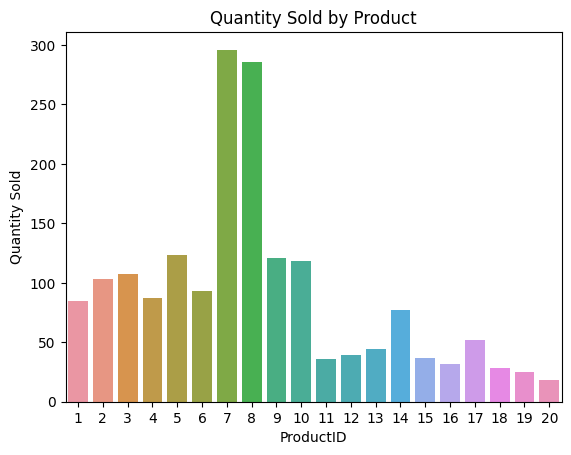

In [63]:
#Calculate the total quantity by ProductID
product_quantity_df = order_df[['ProductID', 'Quantity']].groupby(by='ProductID').sum().reset_index()

#Create the barplot
sb.barplot(data=product_quantity_df,
            x='ProductID',
            y='Quantity')

plt.xlabel("ProductID")
plt.ylabel("Quantity Sold")
plt.title("Quantity Sold by Product")

Text(0.5, 1.0, 'Total Revenue vs Total Cost')

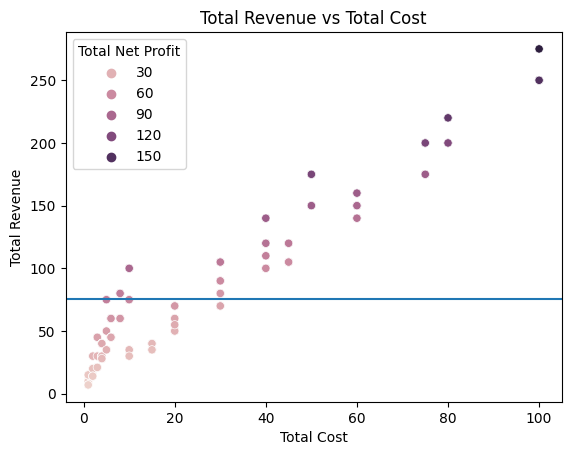

In [64]:
#Create a scatterplot that plots Total Revenue and Total Cost
sb.scatterplot(data=order_df,
               x='Total Cost',
               y='Total Revenue',
               hue = 'Total Net Profit')

plt.axhline(y=np.nanmean(order_df['Total Revenue']))
plt.xlabel("Total Cost")
plt.ylabel("Total Revenue")
plt.title("Total Revenue vs Total Cost")

Text(0.5, 1.0, 'Average Discount % Offered by each City')

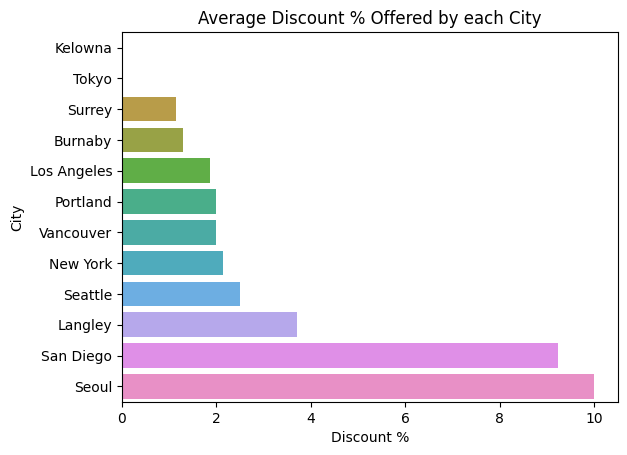

In [65]:
#Create a horizontal barplot that shows the average Discount Pct for each city
#Calculate the average Discount Pct by City. Sort the values by Discount Pct
city_discount_df= order_df[['City', 'Discount Pct']].groupby(by='City').mean().sort_values(by='Discount Pct').reset_index()

#Create barplot
sb.barplot(data=city_discount_df,
           y='City',
           x='Discount Pct',
           orient='h')


plt.xlabel("Discount %")
plt.ylabel("City")
plt.title("Average Discount % Offered by each City")

Text(0, 0.5, 'Total Net Profit')

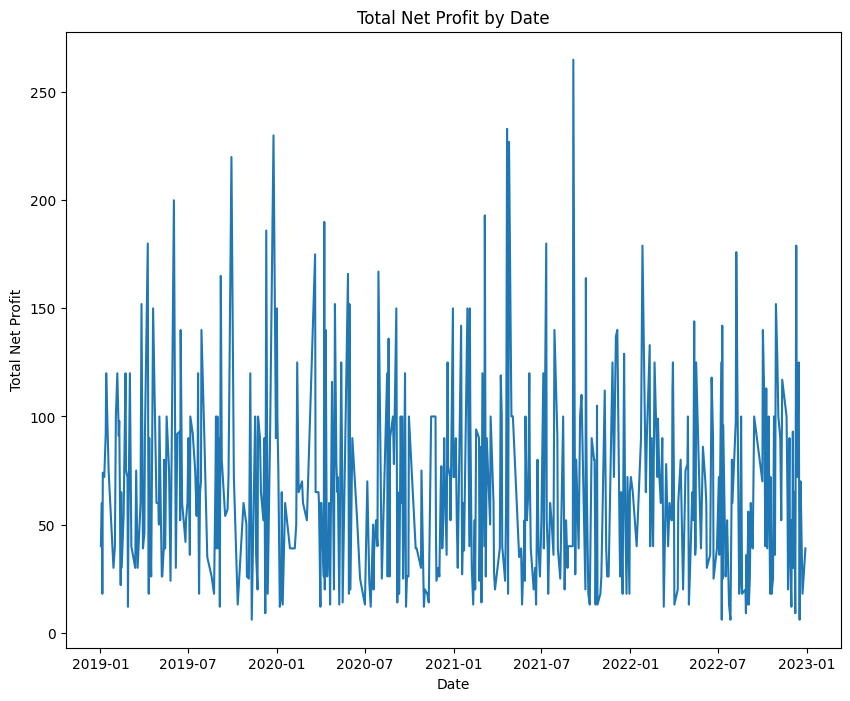

In [66]:
#Create Lineplot that shows the Total Net Profit by Date
#Calculate the Total Net Profit by Date
date_profit_df = order_df[['Date', 'Total Net Profit']].groupby(by='Date').sum()

#Set the plot area
plt.figure(figsize=(10, 8))

#Create the lineplot
sb.lineplot(data = date_profit_df,
            x='Date',
            y='Total Net Profit')

plt.title("Total Net Profit by Date")
plt.xlabel("Date")
plt.ylabel("Total Net Profit")


<Axes: >

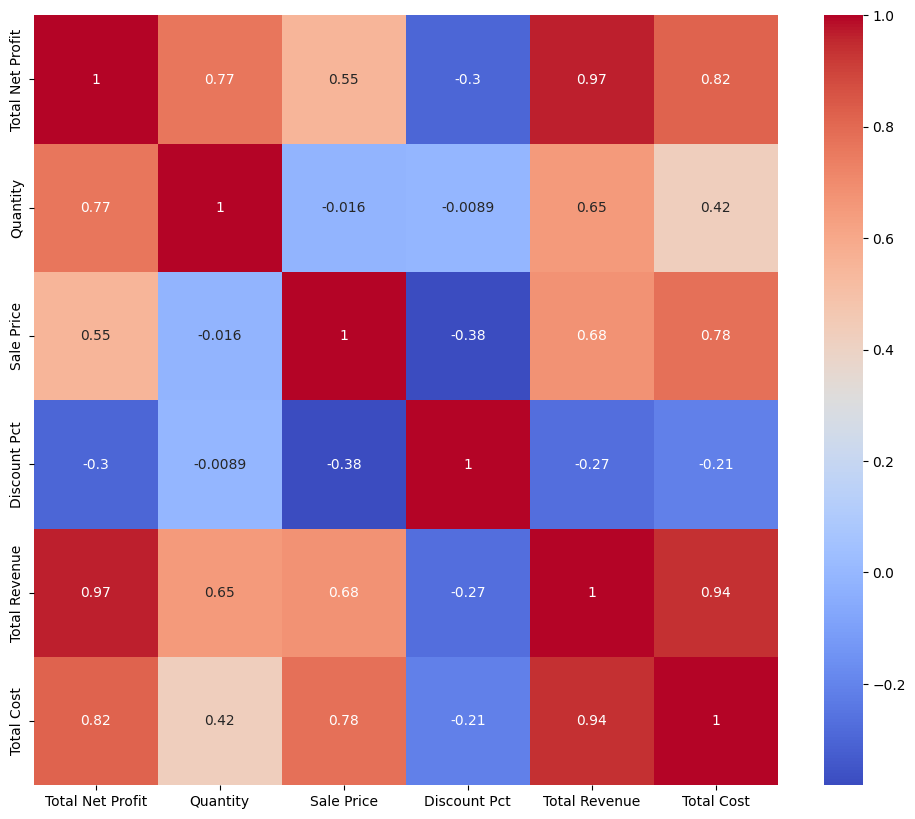

In [67]:
#Create a heatmap to visualize the correlation of the columns in the order dataframe
#Define the columns to include in correlation
corr_df = order_df[['Total Net Profit', 'Quantity', 'Sale Price', 'Discount Pct', 'Total Revenue', 'Total Cost']]

#Calculate the correlation matrix
corr_matrix = corr_df.corr()

#Create the heatmap
plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True, cmap ='coolwarm')

Text(0, 0.5, 'Total Revenue')

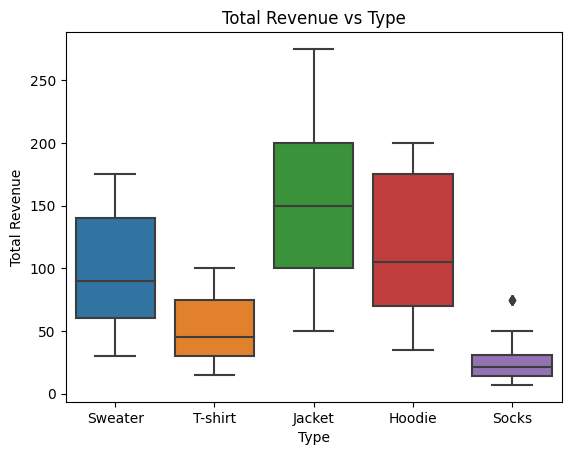

In [68]:
#Create a Boxplot to identify any outliers in Total Revenue for each Type
sb.boxplot(data=order_df,
           x='Type',
           y='Total Revenue')

plt.title("Total Revenue vs Type")
plt.xlabel("Type")
plt.ylabel("Total Revenue")

In [69]:
#Explore the descriptive statistics for the Type that contains the outliers
order_df[order_df['Type']=='Socks']['Total Revenue'].describe()

count    68.000000
mean     26.352941
std      16.200023
min       7.000000
25%      14.000000
50%      21.000000
75%      31.250000
max      75.000000
Name: Total Revenue, dtype: float64

In [70]:
#Calculate the IQR rule for this type to identify the outlier rows
q3 = 31.35
q1 = 14
IQR = q3 - q1
IQR_rule = 1.5*IQR
socks_df = order_df[order_df['Type']=='Socks']

#Return the outlier rows
socks_df[socks_df['Total Revenue'] >= (q3 + IQR_rule)]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
19,12,2019,7,6,5,80,80,"Socks,Black",15,1,...,Vancouver,Standard,3.0,2019-07-06,0,15.0,14.0,75.0,5,70.0
133,12,2022,6,5,5,499,499,"Socks,Black",15,1,...,Vancouver,Standard,3.0,2022-06-05,0,15.0,14.0,75.0,5,70.0
462,12,2020,7,6,5,211,211,"Socks,Black",15,1,...,Langley,Standard,2.0,2020-07-06,0,15.0,14.0,75.0,5,70.0
468,12,2022,12,19,5,599,599,"Socks,Black",15,1,...,Langley,Standard,2.0,2022-12-19,0,15.0,14.0,75.0,5,70.0
